In [1]:
# 1.1 – Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 – Cargar el archivo Excel
ts = pd.read_excel("exports/ts_final.xlsx")

# 1.3 – Vista rápida
print("Dimensiones:", ts.shape)
print("\nTipos de datos:")
print(ts.dtypes)

print("\nPrimeras 5 filas:")
display(ts.head())

print("\nResumen estadístico de variables numéricas:")
display(ts.describe().T)

print("\nValores nulos por columna:")
print(ts.isna().sum())


Dimensiones: (108, 10)

Tipos de datos:
ANO                            int64
MES                            int64
ventas_gasolina                int64
ventas_diesel                  int64
ventas_electrico               int64
ventas_otros                   int64
PIB_nominal                  float64
precio_gasolina_eur_litro    float64
ev_incentivos_mEur           float64
restriccion_score              int64
dtype: object

Primeras 5 filas:


,ANO,MES,ventas_gasolina,ventas_diesel,ventas_electrico,ventas_otros,PIB_nominal,precio_gasolina_eur_litro,ev_incentivos_mEur,restriccion_score
0,2015,1,22787,48250,55,0,1.206165e+12,1.130435,0.0,0
1,2015,2,31283,58821,51,0,1.206165e+12,1.187365,0.0,0
2,2015,3,42380,73040,162,0,1.206165e+12,1.258910,0.0,0
3,2015,4,31291,54507,111,0,1.206165e+12,1.285613,0.0,0
4,2015,5,36275,61082,118,0,1.206165e+12,1.314428,0.0,0



Resumen estadístico de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
ANO,108.0,2.019000e+03,2.594026e+00,2.015000e+03,2.017000e+03,2.019000e+03,2.021000e+03,2.023000e+03
MES,108.0,6.500000e+00,3.468146e+00,1.000000e+00,3.750000e+00,6.500000e+00,9.250000e+00,1.200000e+01
ventas_gasolina,108.0,5.432270e+04,1.739670e+04,2.887000e+03,4.263900e+04,5.432050e+04,6.524000e+04,9.389900e+04
ventas_diesel,108.0,3.852796e+04,1.787649e+04,1.794000e+03,2.106225e+04,3.702850e+04,5.308000e+04,7.489000e+04
ventas_electrico,108.0,1.604972e+03,1.538109e+03,5.100000e+01,4.325000e+02,1.019500e+03,2.236250e+03,6.582000e+03
ventas_otros,108.0,1.888889e+00,4.280653e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.400000e+01
PIB_nominal,108.0,1.380410e+12,1.218543e+11,1.206165e+12,1.289784e+12,1.403496e+12,1.446498e+12,1.620091e+12
precio_gasolina_eur_litro,108.0,1.350977e+00,2.205756e-01,1.078875e+00,1.188771e+00,1.299499e+00,1.441777e+00,2.108957e+00
ev_incentivos_mEur,108.0,1.901000e+02,2.604726e+02,0.000000e+00,1.660000e+01,4.500000e+01,3.500000e+02,8.000000e+02
restriccion_score,108.0,4.444444e+00,3.036640e+00,0.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,9.000000e+00



Valores nulos por columna:
ANO                          0
MES                          0
ventas_gasolina              0
ventas_diesel                0
ventas_electrico             0
ventas_otros                 0
PIB_nominal                  0
precio_gasolina_eur_litro    0
ev_incentivos_mEur           0
restriccion_score            0
dtype: int64


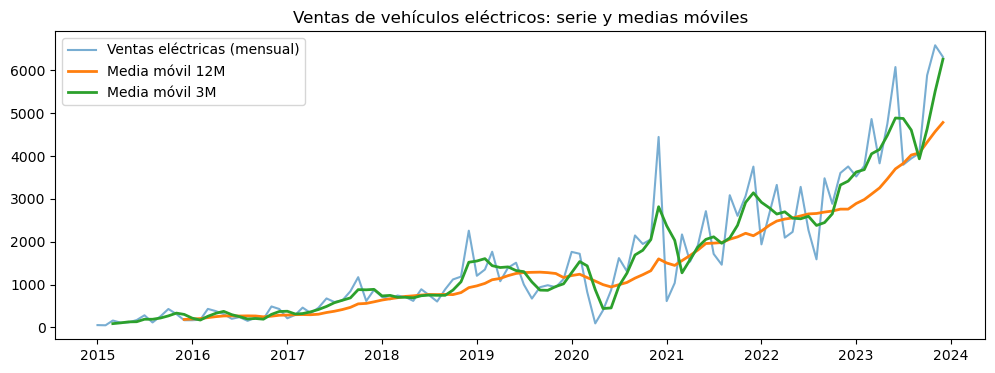

In [3]:
# 2.1 – Convertir a índice de fecha
ts['FECHA'] = pd.to_datetime(ts['ANO'].astype(str) + '-' + ts['MES'].astype(str).str.zfill(2))
ts = ts.set_index('FECHA')

# 2.2 – Gráfica de serie original + medias móviles
plt.figure(figsize=(12,4))
plt.plot(ts['ventas_electrico'], label='Ventas eléctricas (mensual)', alpha=0.6)
plt.plot(ts['ventas_electrico'].rolling(12).mean(), label='Media móvil 12M', linewidth=2)
plt.plot(ts['ventas_electrico'].rolling(3).mean(), label='Media móvil 3M', linewidth=2)
plt.title("Ventas de vehículos eléctricos: serie y medias móviles")
plt.legend(); plt.show()


In [5]:
from statsmodels.tsa.seasonal import STL

# 3.1 – Aplicar STL
stl = STL(ts['ventas_electrico'], period=12, robust=True)
res = stl.fit()


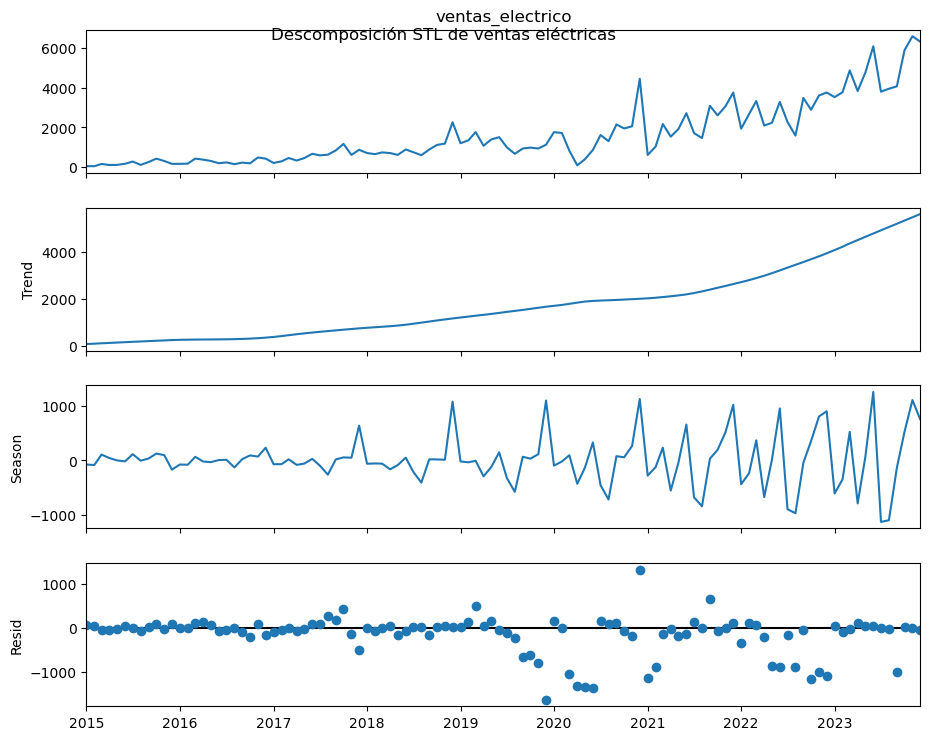

In [7]:
# 3.2 – Graficar componentes
fig = res.plot()
fig.set_size_inches(10,8)
plt.suptitle("Descomposición STL de ventas eléctricas", y=0.93)
plt.show()


In [9]:
# 4.1 – Extraer mes y agrupar
ts['MES_NUM'] = ts.index.month
monthly = ts.groupby('MES_NUM')['ventas_electrico'].agg(['median','mean','std'])


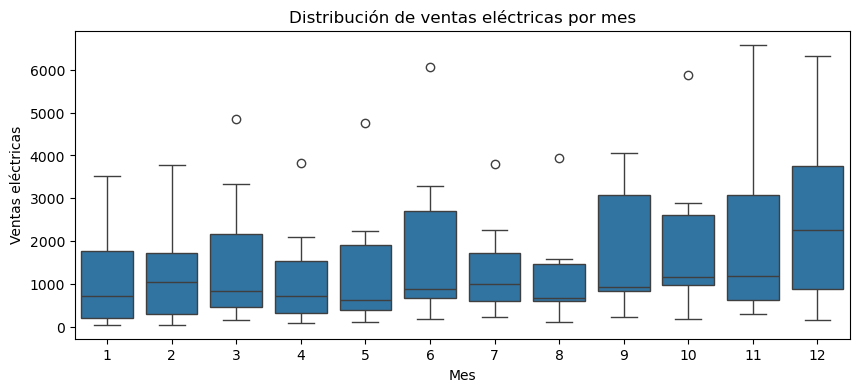

Resumen mensual:


,median,mean,std
MES_NUM,,,
1,712.0,1132.555556,1125.516671
2,1038.0,1303.444444,1248.209028
3,828.0,1639.222222,1581.054536
4,710.0,1130.000000,1217.343008
5,620.0,1356.000000,1479.356448
6,891.0,1821.111111,1921.073167
7,1001.0,1363.666667,1142.607982
8,674.0,1165.000000,1170.852894
9,939.0,1771.111111,1458.490696


In [11]:
# 4.2 – Boxplot por mes
plt.figure(figsize=(10,4))
sns.boxplot(x='MES_NUM', y='ventas_electrico', data=ts.reset_index())
plt.title("Distribución de ventas eléctricas por mes")
plt.xlabel("Mes")
plt.ylabel("Ventas eléctricas")
plt.show()

print("Resumen mensual:")
display(monthly)


In [13]:
# 5.1 – Seleccionar variables numéricas de interés
vars_eda = [
    'ventas_electrico',
    'ev_incentivos_mEur',
    'restriccion_score',
    'PIB_nominal',
    'precio_gasolina_eur_litro'
]
corr_pearson = ts[vars_eda].corr(method='pearson')
corr_spearman = ts[vars_eda].corr(method='spearman')


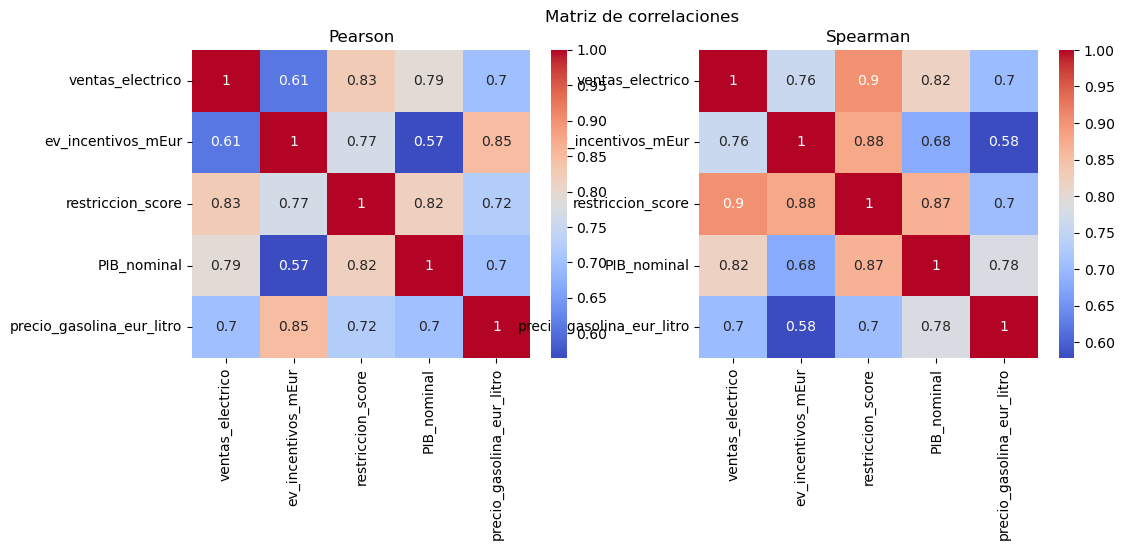

In [15]:
# 5.2 – Heatmaps
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title("Pearson")
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title("Spearman")
plt.suptitle("Matriz de correlaciones"); plt.show()


In [19]:
# 7.1 – Z-score
from scipy.stats import zscore
ts['z_ventas'] = zscore(ts['ventas_electrico'].fillna(0))
outliers_z = ts[np.abs(ts['z_ventas']) > 3]
print("Outliers (|z|>3):")
display(outliers_z[['ventas_electrico','z_ventas']])


Outliers (|z|>3):


,ventas_electrico,z_ventas
FECHA,,
2023-11-01,6582,3.250895
2023-12-01,6309,3.072576


In [21]:
# 7.2 – Método Tukey (IQR)
Q1, Q3 = ts['ventas_electrico'].quantile([0.25,0.75])
IQR = Q3 - Q1
filt = (ts['ventas_electrico'] < (Q1 - 1.5*IQR)) | (ts['ventas_electrico'] > (Q3 + 1.5*IQR))
outliers_tukey = ts[filt]
print("Outliers Tukey:")
display(outliers_tukey['ventas_electrico'])


Outliers Tukey:


FECHA
2023-06-01    6074
2023-10-01    5881
2023-11-01    6582
2023-12-01    6309
Name: ventas_electrico, dtype: int64

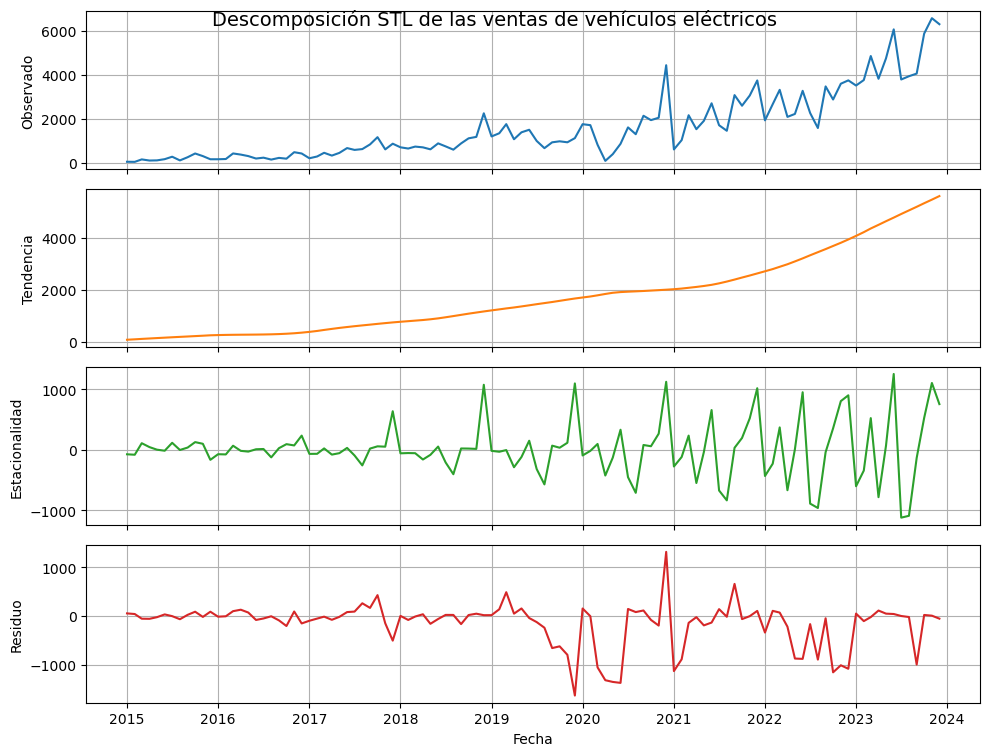

In [23]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Ejecutamos STL
stl = STL(ts['ventas_electrico'], period=12, robust=True)
res = stl.fit()

# Creamos 4 subplots apilados
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
fig.suptitle("Descomposición STL de las ventas de vehículos eléctricos", fontsize=14, y=0.94)

# Serie original
axes[0].plot(ts.index, ts['ventas_electrico'], color='tab:blue')
axes[0].set_ylabel("Observado")
axes[0].grid(True)

# Tendencia
axes[1].plot(ts.index, res.trend, color='tab:orange')
axes[1].set_ylabel("Tendencia")
axes[1].grid(True)

# Componente estacional
axes[2].plot(ts.index, res.seasonal, color='tab:green')
axes[2].set_ylabel("Estacionalidad")
axes[2].grid(True)

# Residuales
axes[3].plot(ts.index, res.resid, color='tab:red')
axes[3].set_ylabel("Residuo")
axes[3].set_xlabel("Fecha")
axes[3].grid(True)

plt.tight_layout()
plt.show()


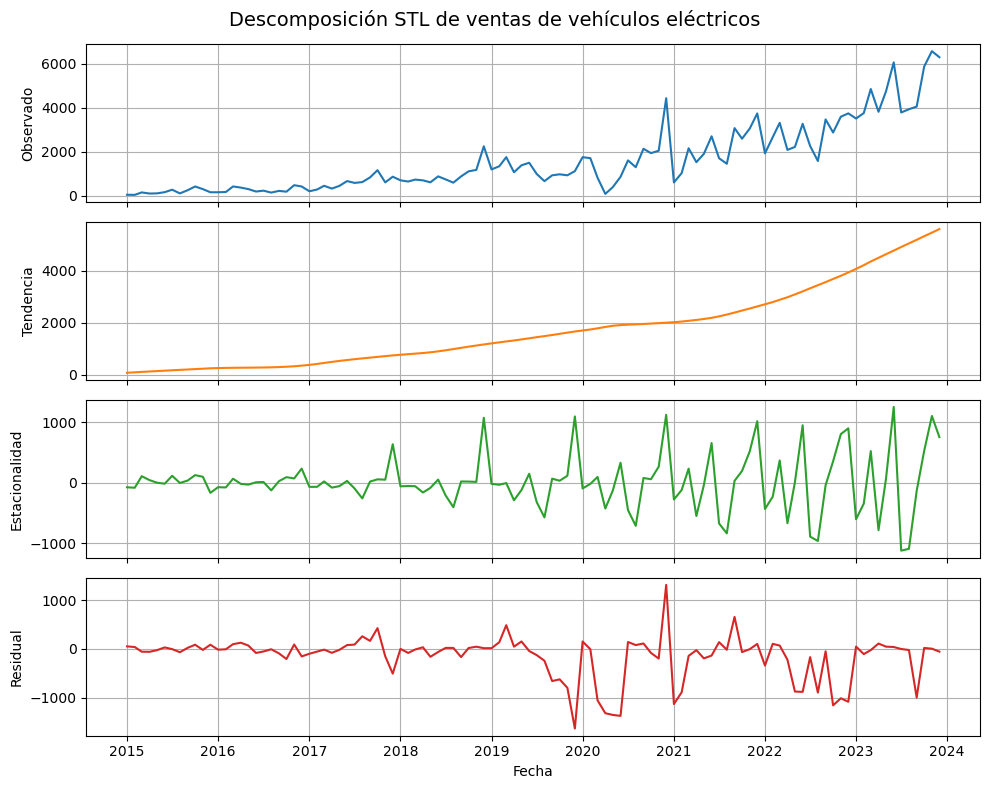

In [25]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Descomposición STL
stl = STL(ts['ventas_electrico'], period=12, robust=True)
res = stl.fit()

# Crear figura y ejes
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Ajustar el espacio superior para el título
fig.subplots_adjust(top=0.90)

# Título general
fig.suptitle("Descomposición STL de ventas de vehículos eléctricos", fontsize=14)

# Observado
axes[0].plot(ts.index, ts['ventas_electrico'], color='tab:blue')
axes[0].set_ylabel("Observado")
axes[0].grid(True)

# Tendencia
axes[1].plot(ts.index, res.trend, color='tab:orange')
axes[1].set_ylabel("Tendencia")
axes[1].grid(True)

# Estacionalidad
axes[2].plot(ts.index, res.seasonal, color='tab:green')
axes[2].set_ylabel("Estacionalidad")
axes[2].grid(True)

# Residuales
axes[3].plot(ts.index, res.resid, color='tab:red')
axes[3].set_ylabel("Residual")
axes[3].set_xlabel("Fecha")
axes[3].grid(True)

plt.tight_layout()  # Ajuste del layout
plt.show()


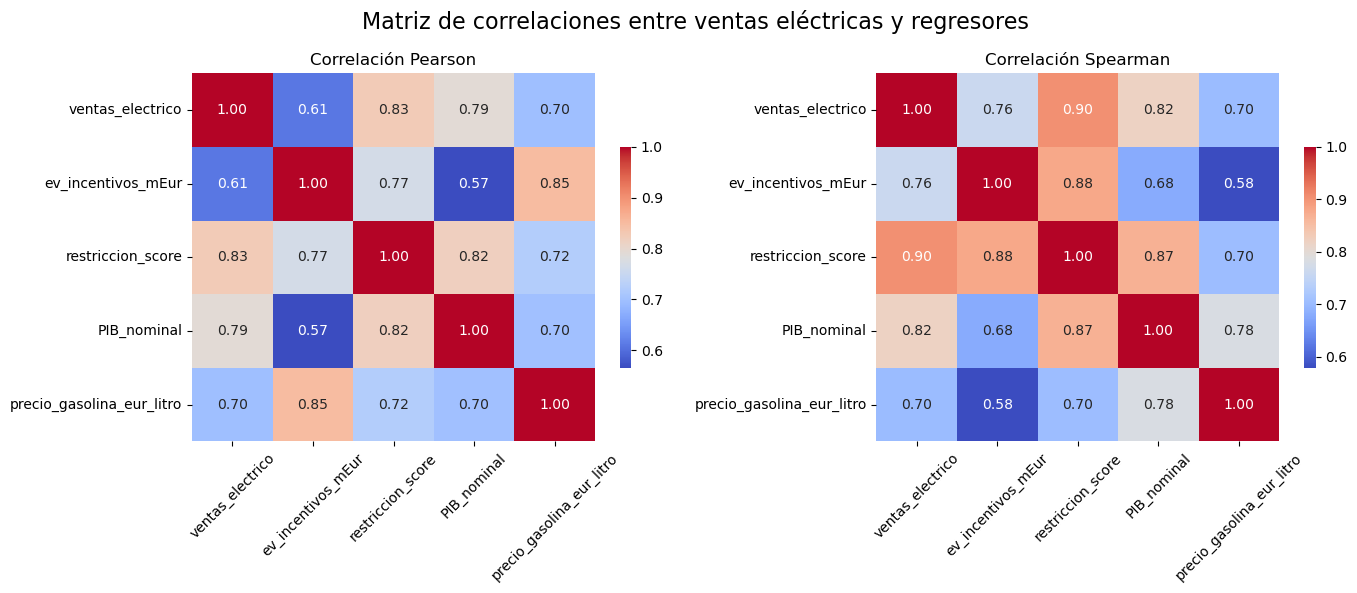

In [27]:
# Creamos la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap Pearson
sns.heatmap(
    corr_pearson,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    ax=axes[0],
    cbar_kws={"shrink": 0.6}
)
axes[0].set_title("Correlación Pearson")
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Heatmap Spearman
sns.heatmap(
    corr_spearman,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    ax=axes[1],
    cbar_kws={"shrink": 0.6}
)
axes[1].set_title("Correlación Spearman")
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

# Título general y ajustes finales
fig.suptitle("Matriz de correlaciones entre ventas eléctricas y regresores", fontsize=16)
plt.subplots_adjust(top=0.88, bottom=0.12, wspace=0.3)
plt.tight_layout()
plt.show()